### Center for Economic Opportunity Poverty Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv
import dateutil
import os
%matplotlib inline

In [2]:
puma_09 = pd.read_csv('2009 NYC Web Dataset.csv')
puma_09.columns

/Users/shalmali/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (302) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG',
       'ADJINC', 'WGTP', 'NP',
       ...
       'MOOP', 'HEAP', 'WIC', 'FoodStamps', 'SchoolLunch', 'SchoolBreakfast',
       'FICAtax', 'IncomeTax', 'CD', 'Nabe'],
      dtype='object', length=506)

In [3]:
puma_09.Povunit.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [176]:
puma_09.drop(puma_09.columns[2:470], axis=1, inplace=True)

In [177]:
puma_09.head()

,RT,SERIALNO,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80,Boro,Povunit,...,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,FICAtax,IncomeTax,CD,Nabe
0,H,89,130,153,238,133,50,203,4,1,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,39,39
1,H,89,175,140,260,155,51,268,4,1,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,39,39
2,H,147,326,232,382,235,67,336,2,1,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25
3,H,147,343,173,378,210,59,331,2,1,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25
4,H,147,311,146,388,232,51,298,2,1,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25


In [178]:
puma_09.drop(puma_09.columns[[0,2,3,4,5,6,7]], axis=1, inplace=True)
puma_09.columns

Index(['SERIALNO', 'Boro', 'Povunit', 'Povrel', 'PovunitType', 'HousingStatus',
       'Ethnicity', 'WorkersEquiv', 'EducAttain', 'CitizenStatus', 'AgeCateg',
       'WorkExpIndiv', 'PreTaxIncome', 'Official_Threshold',
       'Official_Poverty', 'CEO_Income', 'CEO_Threshold', 'CEO_Poverty',
       'Housing', 'Childcare', 'Commuting', 'MOOP', 'HEAP', 'WIC',
       'FoodStamps', 'SchoolLunch', 'SchoolBreakfast', 'FICAtax', 'IncomeTax',
       'CD', 'Nabe'],
      dtype='object')

In [180]:
aggregates = {'Boro':'min','Povunit':'max','Povrel':'min','PovunitType':'min',
             'HousingStatus':'min','Ethnicity':'max','WorkersEquiv':'min',
             'EducAttain':'max','CitizenStatus':'min','AgeCateg':'max','WorkExpIndiv':'min',
             'PreTaxIncome':'mean','Official_Threshold':'max','Official_Poverty':'max',
             'CEO_Income':'mean','CEO_Threshold':'mean','CEO_Poverty':'max',
             'Housing':'mean','Childcare':'mean','Commuting':'mean','MOOP':'mean',
             'HEAP':'mean','WIC':'mean','FoodStamps':'min','SchoolLunch':'min','SchoolBreakfast':'min',
             'FICAtax':'max','IncomeTax':'max','CD':'min','Nabe':'min'}
df = puma_09.groupby('SERIALNO').agg(aggregates)
df.head()

,Official_Poverty,AgeCateg,CitizenStatus,CEO_Poverty,Official_Threshold,MOOP,Nabe,EducAttain,FoodStamps,FICAtax,...,CD,CEO_Income,Housing,CEO_Threshold,IncomeTax,HousingStatus,WIC,Childcare,Povunit,WorkersEquiv
SERIALNO,,,,,,,,,,,,,,,,,,,,,
89,2,2,2,2,14366,635.68,39,2,0.0,2584.355436,...,39,23924.921801,0.000000,19124.177185,4015.360096,6,0.0,0.0,1,1
147,1,2,3,1,30180,710.00,25,3,0.0,2064.425940,...,24,35485.505035,0.000000,41844.911063,-11038.890975,4,0.0,0.0,1,2
152,2,3,1,2,12968,1869.00,46,3,0.0,0.000000,...,44,33487.800000,0.000000,19124.177185,-375.000000,6,0.0,0.0,1,5
215,2,2,1,2,11161,4986.00,36,3,0.0,3440.709900,...,32,34467.268361,4561.247187,13563.246231,8995.508926,8,0.0,0.0,1,4
217,2,2,1,2,11161,2381.30,50,3,0.0,2102.656050,...,50,17773.851345,0.000000,13563.246231,3348.725938,9,0.0,0.0,1,3


In [181]:
df.columns

Index(['Official_Poverty', 'AgeCateg', 'CitizenStatus', 'CEO_Poverty',
       'Official_Threshold', 'MOOP', 'Nabe', 'EducAttain', 'FoodStamps',
       'FICAtax', 'WorkExpIndiv', 'SchoolLunch', 'Commuting', 'HEAP',
       'Ethnicity', 'PovunitType', 'Boro', 'SchoolBreakfast', 'Povrel',
       'PreTaxIncome', 'CD', 'CEO_Income', 'Housing', 'CEO_Threshold',
       'IncomeTax', 'HousingStatus', 'WIC', 'Childcare', 'Povunit',
       'WorkersEquiv'],
      dtype='object')

In [182]:
df.reset_index(inplace=True)

In [183]:
df.head(2)

,SERIALNO,Official_Poverty,AgeCateg,CitizenStatus,CEO_Poverty,Official_Threshold,MOOP,Nabe,EducAttain,FoodStamps,...,CD,CEO_Income,Housing,CEO_Threshold,IncomeTax,HousingStatus,WIC,Childcare,Povunit,WorkersEquiv
0,89,2,2,2,2,14366,635.68,39,2,0.0,...,39,23924.921801,0.0,19124.177185,4015.360096,6,0.0,0.0,1,1
1,147,1,2,3,1,30180,710.00,25,3,0.0,...,24,35485.505035,0.0,41844.911063,-11038.890975,4,0.0,0.0,1,2


In [185]:
df.columns

Index(['SERIALNO', 'Official_Poverty', 'AgeCateg', 'CitizenStatus',
       'CEO_Poverty', 'Official_Threshold', 'MOOP', 'Nabe', 'EducAttain',
       'FoodStamps', 'FICAtax', 'WorkExpIndiv', 'SchoolLunch', 'Commuting',
       'HEAP', 'Ethnicity', 'PovunitType', 'Boro', 'SchoolBreakfast', 'Povrel',
       'PreTaxIncome', 'CD', 'CEO_Income', 'Housing', 'CEO_Threshold',
       'IncomeTax', 'HousingStatus', 'WIC', 'Childcare', 'Povunit',
       'WorkersEquiv'],
      dtype='object')

In [187]:
df.shape

(25740, 31)

In [189]:
trial = df[['Nabe','PovunitType', 'HousingStatus',
       'Ethnicity', 'WorkersEquiv', 'AgeCateg', 'EducAttain',
       'Housing', 'Childcare', 'Commuting', 'MOOP', 'HEAP', 'WIC',
       'FoodStamps', 'SchoolLunch', 'SchoolBreakfast', 
        'CEO_Threshold', 'CEO_Poverty']]

In [190]:
trial.head()

,Nabe,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,AgeCateg,EducAttain,Housing,Childcare,Commuting,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,CEO_Threshold,CEO_Poverty
0,39,2,6,3,1,2,2,0.000000,0.0,2622.106667,635.68,0.0,0.0,0.0,0.0,0,19124.177185,2
1,25,4,4,2,2,2,3,0.000000,0.0,764.400000,710.00,0.0,0.0,0.0,0.0,0,41844.911063,1
2,46,2,6,1,5,3,3,0.000000,0.0,0.000000,1869.00,0.0,0.0,0.0,0.0,0,19124.177185,2
3,36,8,8,1,4,2,3,4561.247187,0.0,646.800000,4986.00,0.0,0.0,0.0,0.0,0,13563.246231,2
4,50,8,9,2,3,2,3,0.000000,0.0,1879.166667,2381.30,0.0,0.0,0.0,0.0,0,13563.246231,2


In [200]:
trial.CEO_Poverty[trial.CEO_Poverty == 2] = 0

/Users/shalmali/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/shalmali/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/shalmali/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.u

In [201]:
trial.CEO_Poverty.value_counts()

0    21001
1     4739
Name: CEO_Poverty, dtype: int64

In [202]:
y = trial.loc[:,"CEO_Poverty"]
X = trial.loc[:,"PovunitType":"CEO_Threshold"]

In [203]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [204]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs

rf=DTC()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.99933399933399936

In [205]:
rf.score(X_test,Y_test)

0.81520331520331524

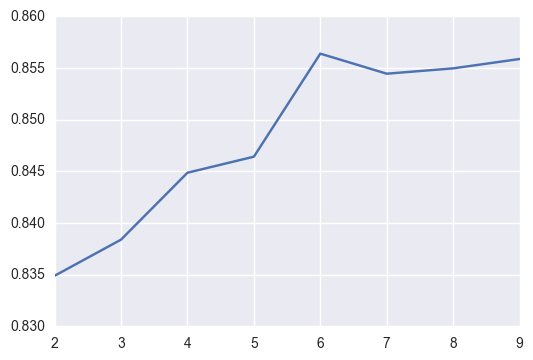

In [206]:
## #Use OS accuracy.
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3,random_state=999)
OS=[]
for i in range(2,10,1):
    rf=DTC(max_depth=i)
    rf.fit(X_train,Y_train)
    OS.append(rf.score(X_test,Y_test))
    
plt.plot(range(2,10,1),OS)

In [207]:
real=np.array(Y_test.apply(int))
AUC=[]
for i in range(2,100,3):    
    rf = DTC(max_leaf_nodes=i)
    rf.fit(X_train, Y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(rs(real,pred))

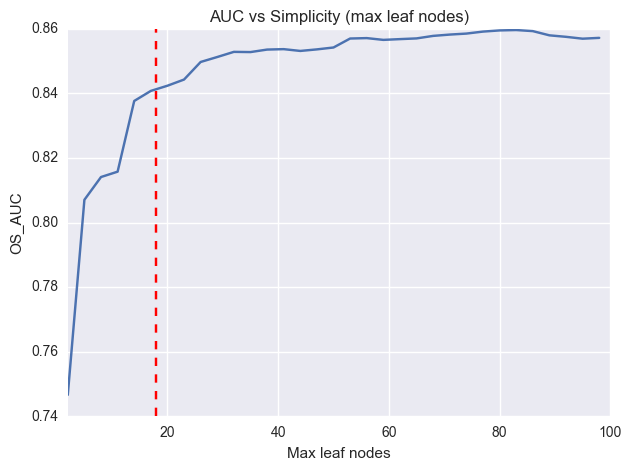

In [208]:
plt.figure(figsize=(7,5))
plt.plot(range(2,100,3),AUC)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.axvline(18,color='r',linestyle='--')
plt.xlim(2,100)
plt.show()

In [209]:
rf = DTC(max_depth=6)
rf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [210]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
3,WorkersEquiv,0.508629
9,MOOP,0.135498
6,Housing,0.0737245
1,HousingStatus,0.05323
13,SchoolLunch,0.0520608


In [211]:
X_train_simple=X_train.loc[:,["WorkersEquiv","MOOP","Housing","HousingStatus",'SchoolLunch']]
X_test_simple = X_test.loc[:,["WorkersEquiv","MOOP","Housing","HousingStatus",'SchoolLunch']]

In [213]:
#Let's see the performance of this simple model:
real=np.array(Y_test.apply(int))
rf = DTC(max_depth=6) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, Y_train)
pred=rf.predict_proba(X_test_simple)[:,1]
print("The AUC score for this simple model with 5 features is : {}".format(rs(real,pred)))

The AUC score for this simple model with 5 features is : 0.8408616209533256


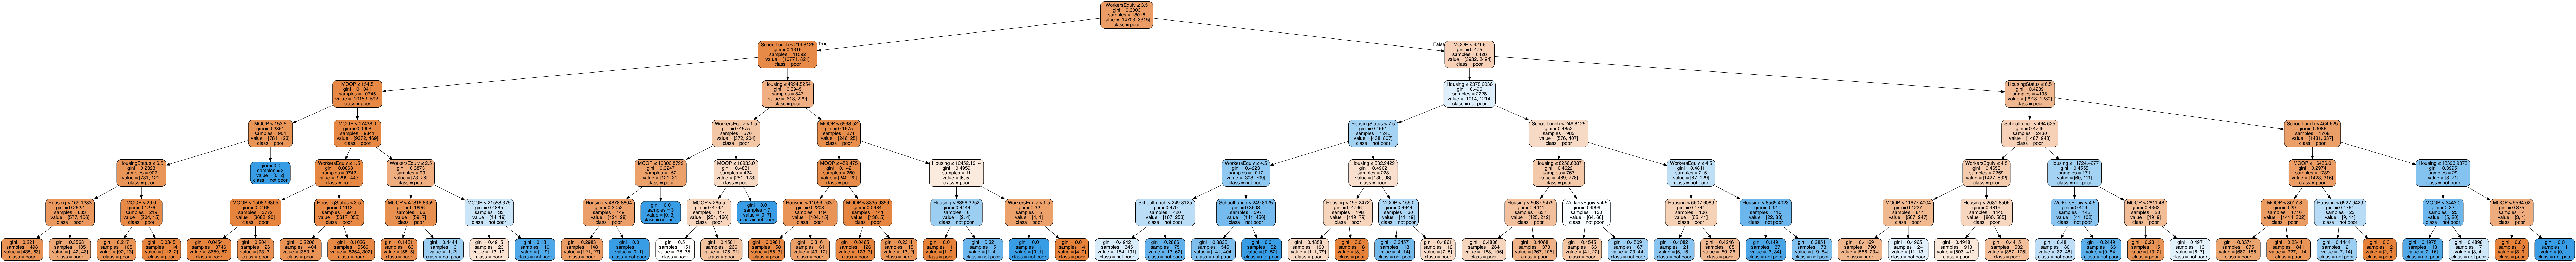

In [214]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(rf, out_file=dot_data,  
                         feature_names=["WorkersEquiv","MOOP","Housing","HousingStatus",'SchoolLunch'],  
                         class_names=["poor", "not poor"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [161]:
puma_09.shape

(63066, 506)

In [160]:
len(puma_09.SERIALNO.unique())

25740

In [149]:
puma_09.iloc[:,476:].head()

,Boro,Povunit,Povrel,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,EducAttain,CitizenStatus,AgeCateg,...,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,FICAtax,IncomeTax,CD,Nabe
0,4,1,1,2,6,3,1,2,2,2,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,39,39
1,4,1,2,2,6,3,1,2,3,2,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,39,39
2,2,1,1,4,4,2,2,3,3,2,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25
3,2,1,4,4,4,2,2,1,3,2,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25
4,2,1,4,4,4,2,2,1,3,2,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25


In [5]:
from pylab import *

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap=cm.coolwarm, interpolation='none')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

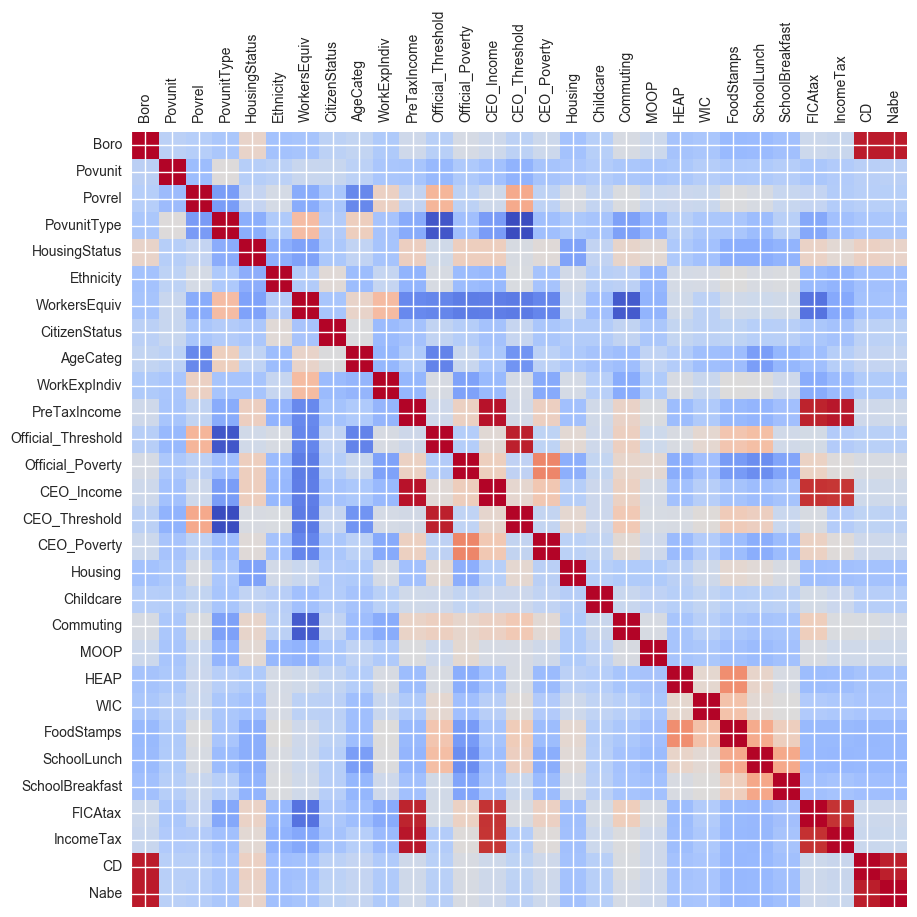

In [6]:
plot_corr(puma_09.iloc[:,476:])

## Heatmap of Correlation coefficient between variables

In [7]:
puma_09.iloc[:,476:].corr()

,Boro,Povunit,Povrel,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,CitizenStatus,AgeCateg,WorkExpIndiv,...,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,FICAtax,IncomeTax,CD,Nabe
Boro,1.000000,0.008557,-0.012957,-0.072765,0.276690,-0.104487,-0.092644,0.012478,0.050131,-0.053344,...,0.098569,-0.097337,-0.075491,-0.157109,-0.148928,-0.114129,0.096764,0.080779,0.963506,0.963557
Povunit,0.008557,1.000000,-0.136313,0.202550,-0.024895,0.013332,0.082254,0.073381,0.015127,-0.076036,...,-0.087238,-0.064363,-0.024471,-0.053202,-0.046854,-0.021511,-0.072854,-0.044177,-0.004611,0.000480
Povrel,-0.012957,-0.136313,1.000000,-0.302789,0.055681,0.139911,-0.233438,-0.075214,-0.389729,0.299720,...,0.087282,0.092507,0.088460,0.179934,0.152322,0.071362,0.055215,-0.032725,-0.002511,-0.016210
PovunitType,-0.072765,0.202550,-0.302789,1.000000,-0.217422,-0.054521,0.428699,-0.037591,0.316687,-0.092310,...,-0.178626,-0.010233,-0.072294,-0.076289,-0.134804,-0.000786,-0.248008,-0.117171,-0.078403,-0.074056
HousingStatus,0.276690,-0.024895,0.055681,-0.217422,1.000000,-0.214926,-0.272581,-0.064643,0.037438,-0.094499,...,0.230757,-0.056488,-0.102764,-0.219957,-0.216728,-0.188760,0.290967,0.231909,0.300870,0.276416
Ethnicity,-0.104487,0.013332,0.139911,-0.054521,-0.214926,1.000000,-0.032207,0.220087,-0.137618,0.063317,...,-0.164863,0.141158,0.147978,0.192851,0.159336,0.171550,-0.157734,-0.185902,-0.118964,-0.118993
WorkersEquiv,-0.092644,0.082254,-0.233438,0.428699,-0.272581,-0.032207,1.000000,-0.086954,0.277287,0.431569,...,-0.185072,0.115928,0.007332,0.108580,0.097426,0.118790,-0.471573,-0.244740,-0.101360,-0.092285
CitizenStatus,0.012478,0.073381,-0.075214,-0.037591,-0.064643,0.220087,-0.086954,1.000000,0.180524,-0.146093,...,-0.064420,0.045125,0.008276,0.022917,-0.016720,-0.012180,-0.068649,-0.096202,0.018006,0.022257
AgeCateg,0.050131,0.015127,-0.389729,0.316687,0.037438,-0.137618,0.277287,0.180524,1.000000,-0.176071,...,0.037569,-0.026238,-0.125079,-0.128203,-0.294703,-0.173251,-0.120887,-0.014662,0.055487,0.057173
WorkExpIndiv,-0.053344,-0.076036,0.299720,-0.092310,-0.094499,0.063317,0.431569,-0.146093,-0.176071,1.000000,...,-0.045311,0.156295,0.077266,0.191130,0.189263,0.109316,-0.227827,-0.150668,-0.049543,-0.051525


In [162]:
trial = df.iloc[:,360:]

In [163]:
trial.columns

Index(['Povunit', 'Povrel', 'PovunitType', 'HousingStatus', 'Ethnicity',
       'WorkersEquiv', 'CitizenStatus', 'AgeCateg', 'WorkExpIndiv',
       'PreTaxIncome', 'Official_Threshold', 'Official_Poverty', 'CEO_Income',
       'CEO_Threshold', 'CEO_Poverty', 'Housing', 'Childcare', 'Commuting',
       'MOOP', 'HEAP', 'WIC', 'FoodStamps', 'SchoolLunch', 'SchoolBreakfast',
       'FICAtax', 'IncomeTax', 'CD', 'Nabe'],
      dtype='object')

In [165]:
trial.dtypes

Povunit               float64
Povrel                float64
PovunitType           float64
HousingStatus         float64
Ethnicity             float64
WorkersEquiv          float64
CitizenStatus         float64
AgeCateg              float64
WorkExpIndiv          float64
PreTaxIncome          float64
Official_Threshold    float64
Official_Poverty      float64
CEO_Income            float64
CEO_Threshold         float64
CEO_Poverty           float64
Housing               float64
Childcare             float64
Commuting             float64
MOOP                  float64
HEAP                  float64
WIC                   float64
FoodStamps            float64
SchoolLunch           float64
SchoolBreakfast       float64
FICAtax               float64
IncomeTax             float64
CD                    float64
Nabe                  float64
dtype: object

In [164]:
trial.CEO_Poverty.value_counts()

2.000000    20413
1.000000     4739
1.500000      249
1.666667      107
1.333333       52
1.750000       42
1.800000       27
1.833333       16
1.600000       13
1.250000       12
1.200000       12
1.400000       11
1.857143       10
1.875000        7
1.900000        4
1.166667        4
1.888889        4
1.142857        3
1.555556        2
1.571429        2
1.916667        2
1.714286        2
1.444444        1
1.818182        1
1.285714        1
1.625000        1
1.777778        1
1.454545        1
1.428571        1
Name: CEO_Poverty, dtype: int64

In [167]:
trial = trial[['Nabe','PovunitType', 'HousingStatus',
       'Ethnicity', 'WorkersEquiv', 
       'Housing', 'Childcare', 'Commuting', 'MOOP', 'HEAP', 'WIC',
       'FoodStamps', 'SchoolLunch', 'SchoolBreakfast', 
        'CEO_Threshold', 'CEO_Poverty']]

In [168]:
trial.head(2)

,Nabe,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,Housing,Childcare,Commuting,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,CEO_Threshold,CEO_Poverty
0,39.0,2.0,6.0,3.0,1.0,0.0,0.0,2622.106667,635.68,0.0,0.0,0.0,0.0,0.0,19124.177185,2.0
1,25.0,4.0,4.0,2.0,2.0,0.0,0.0,764.400000,710.00,0.0,0.0,0.0,0.0,0.0,41844.911063,1.0


In [126]:
trial.CEO_Poverty[trial.CEO_Poverty == 2] = 0

In [127]:
trial.CEO_Poverty.value_counts()

0    51230
1    11836
Name: CEO_Poverty, dtype: int64

In [128]:
y = trial.loc[:,"CEO_Poverty"]
X = trial.loc[:,"PovunitType":"CEO_Threshold"]

In [129]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [130]:
X_train.shape

(44146, 14)

In [131]:
X.dtypes

PovunitType          int64
HousingStatus        int64
Ethnicity            int64
WorkersEquiv         int64
Housing            float64
Childcare          float64
Commuting          float64
MOOP               float64
HEAP                 int64
WIC                float64
FoodStamps         float64
SchoolLunch        float64
SchoolBreakfast      int64
CEO_Threshold      float64
dtype: object

In [132]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs

rf=DTC()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.99861822135640832

In [133]:
rf.score(X_test,Y_test)

0.93868921775898517

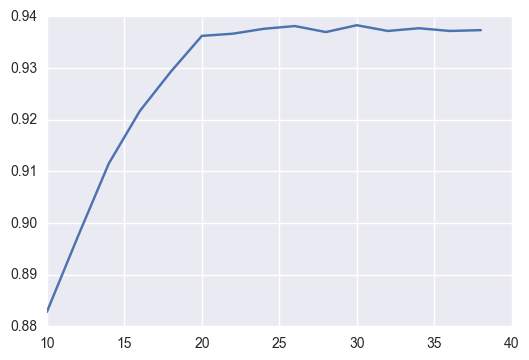

In [136]:
## #Use OS accuracy.
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3,random_state=999)
OS=[]
for i in range(10,40,2):
    rf=DTC(max_depth=i)
    rf.fit(X_train,Y_train)
    OS.append(rf.score(X_test,Y_test))
    
plt.plot(range(10,40,2),OS)

In [137]:
rf = DTC(max_depth=20)
rf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [138]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
7,MOOP,0.240265
3,WorkersEquiv,0.196296
6,Commuting,0.108109
4,Housing,0.0898227
10,FoodStamps,0.0683478


In [139]:
X_train_simple=X_train.loc[:,["MOOP","WorkersEquiv","Commuting","Housing","FoodStamps"]]
X_test_simple = X_test.loc[:,["MOOP","WorkersEquiv","Commuting","Housing","FoodStamps"]]

In [142]:
#Let's see the performance of this simple model:
real=np.array(Y_test.apply(int))
rf = DTC(max_depth=20) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, Y_train)
pred=rf.predict_proba(X_test_simple)[:,1]
print("The AUC score for this simple model with 5 features is : {}".format(rs(real,pred)))

The AUC score for this simple model with 5 features is : 0.8984827638105569


In [ ]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(rf, out_file=dot_data,  
                         feature_names=["MOOP","WorkersEquiv","Commuting","Housing","FoodStamps"],  
                         class_names=["poor", "not poor"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  